In [2]:
import numpy as np
import matplotlib.pyplot as pl
from astropy.io.votable import parse



In [181]:
NGC_white = np.loadtxt('NGC_white.txt').T
NGC_vot = parse('v2.vot')
table = NGC_vot.get_first_table()

In [188]:
table_arr = table.array
table

<Table length=1264>
 SBL    RAJ2000     DEJ2000     Vmag    V-Ic  ...  e_Vmag  e_B-V    Prob  SpType
                                mag     mag   ...   mag     mag                 
int16    str11       str11    float32 float32 ... float32 float32 float32  str8 
----- ----------- ----------- ------- ------- ... ------- ------- ------- ------
    1 07 55 49.34 -60 29 17.6  13.474      -- ...   0.003   0.006      --       
    2 07 55 51.28 -60 34 18.8  14.262   0.753 ...   0.003   0.010      --       
    3 07 55 50.51 -60 43 24.1  14.446   0.806 ...   0.000   0.001      --       
    4 07 55 51.45 -60 36 52.4  16.591   0.771 ...   0.008   0.008      --       
    5 07 55 50.78 -60 45 31.5  16.397   0.839 ...   0.019   0.019      --       
    6 07 55 51.67 -60 37 42.7  16.443   0.855 ...   0.000   0.004      --       
    7 07 55 52.72 -60 32 30.8  14.701   0.881 ...   0.001   0.004      --       
    8 07 55 52.64 -60 46 08.0  10.910   0.638 ...   0.014   0.017    0.00       
    9 07

''

In [191]:

BV = []
V=[]
BV_all =[]
V_all=[]
for i in range(len(table_arr)):
    if table_arr[i][9] >= 0.6:
        BV.append(table_arr[i][5])
        V.append(table_arr[i][3])
for i in range(len(table_arr)):
    BV_all.append(table_arr[i][5])
    V_all.append(table_arr[i][3])
BV = np.array(BV)
V=np.array(V)
BV_all = np.array(BV_all)
V_all=np.array(V_all)
    

<ipython-input-191-8c7087acfb34>:14: UserWarning: Warning: converting a masked element to nan.
  BV_all = np.array(BV_all)


In [192]:
V_w = NGC_white[1]
BV_w = NGC_white[2]


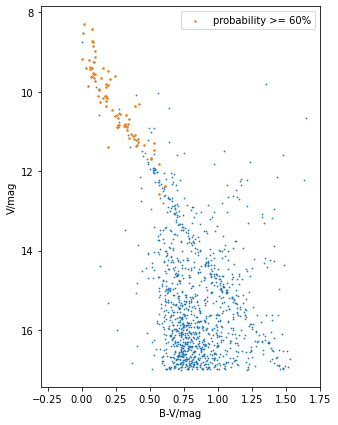

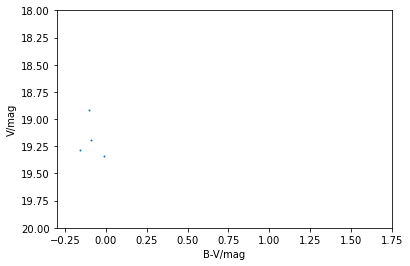

In [193]:
fig = pl.figure()
fig.set_figheight(7)
fig.set_figwidth(5)
pl.scatter(BV_all, V_all, s= 0.5)
pl.scatter(BV ,V , s =2, label='probability >= 60%')
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')
#pl.scatter(BV_w, V_w, s= 1)

pl.gca().invert_yaxis()
pl.legend()
pl.xlim(-0.3,1.75)
pl.savefig('ccd_2516.jpeg')
pl.show()
fig1 = pl.figure()
pl.scatter(BV_w, V_w, s= 1)
pl.gca().invert_yaxis()
pl.xlim(-0.3,1.75)
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')
pl.ylim(20,18)
pl.savefig('ccd_w.jpeg')
pl.show()



In [194]:
'''isochrones'''
age1 = np.loadtxt('FEHm010/100z0125800y264P00O1D1E1.isc_john').T
age2 = np.loadtxt('FEHm010/150z0125800y264P00O1D1E1.isc_john').T
age3 = np.loadtxt('FEHm010/200z0125800y264P00O1D1E1.isc_john').T
age4 = np.loadtxt('FEHm010/250z0125800y264P00O1D1E1.isc_john').T
age5 = np.loadtxt('FEHm010/300z0125800y264P00O1D1E1.isc_john').T

age1

age1.shape


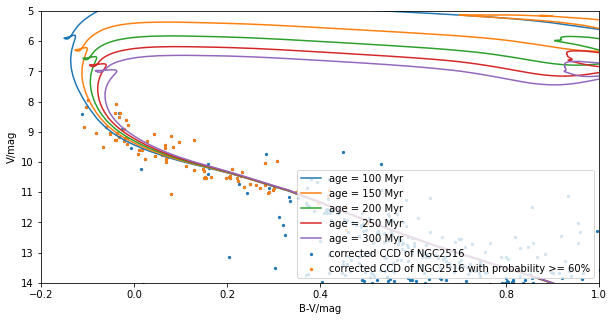

In [195]:
for i in range(1,6):
    globals()['B{}'.format(i)] = globals()['age{}'.format(i)][6]
    globals()['V{}'.format(i)] = globals()['age{}'.format(i)][7]
    globals()['BV{}'.format(i)] = globals()['B{}'.format(i)]-globals()['V{}'.format(i)]
fig3 = pl.figure()
fig3.set_figheight(5)
fig3.set_figwidth(10)
for i in range(1,6):
    age= 100+50*(i-1)
    pl.plot(globals()['BV{}'.format(i)], globals()['V{}'.format(i)]+7.77, label = 'age = '+str(age)+' Myr')
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')
#pl.scatter(BV_w, V_w, s= 1)
pl.scatter(BV_all-EBV ,V_all-EBV*3.1 , s =5, label='corrected CCD of NGC2516')
pl.scatter(BV-EBV ,V-EBV*3.1 , s =5, label='corrected CCD of NGC2516 with probability >= 60%')

pl.gca().invert_yaxis()
pl.legend(loc = 'lower right')
pl.ylim(14,5)
pl.xlim(-0.2,1)
pl.xticks([-0.2,0.0,0.2,0.4,0.8,1.0])
pl.savefig('ccd_isc.jpeg')
pl.show()


In [196]:
age1.shape


(16, 2100)

(-0.2, 1.0)

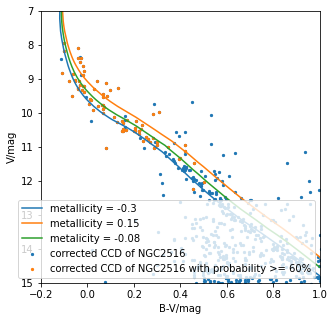

In [197]:
me030 = np.loadtxt('me030.isc_john').T # age 150 Myrs and metalicity = -0.30
me015 = np.loadtxt('me015.isc_john').T # age 150 Myrs and metalicity = 0.15
fig4 = pl.figure()
fig4.set_figheight(5)
fig4.set_figwidth(5)

pl.plot(me030[6]-me030[7],me030[7]+7.77, label ='metallicity = -0.3')
pl.plot(me015[6]-me015[7],me015[7]+7.77, label ='metallicity = 0.15')
pl.plot(BV2, V2+7.77, label = 'metalicity = -0.08')
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')
pl.xlim(-0.2,1.0)
#pl.scatter(BV_w, V_w, s= 1)
pl.scatter(BV_all-EBV ,V_all-EBV*3.1 , s =5, label='corrected CCD of NGC2516')
pl.scatter(BV-EBV ,V-EBV*3.1 , s =5, label='corrected CCD of NGC2516 with probability >= 60%')

pl.gca().invert_yaxis()
pl.legend(loc = 'lower right')
pl.ylim(15,7)
pl.savefig('ccd_isc_me.jpeg')
pl.xlim(-0.2,1.0)

In [215]:
BV_error =[]
V_error=[]
for i in range(len(table_arr)):
    if table_arr[i][9] >= 0.6:
        BV_error.append(table_arr[i][8])
        V_error.append(table_arr[i][7])
BV_err = np.array(BV_error)
V_err = np.array(V_error)

array([0.013, 0.013, 0.024, 0.024, 0.019, 0.011, 0.014, 0.014, 0.022,
       0.016, 0.02 , 0.017, 0.005, 0.047, 0.015, 0.014, 0.015, 0.009,
       0.022, 0.01 , 0.023, 0.014, 0.011, 0.02 , 0.019, 0.019, 0.01 ,
       0.014, 0.018, 0.008, 0.01 , 0.012, 0.013, 0.019, 0.009, 0.019,
       0.013, 0.018, 0.002, 0.013, 0.011, 0.016, 0.019, 0.018, 0.011,
       0.003, 0.005, 0.013, 0.006, 0.007, 0.011, 0.001, 0.012, 0.016,
       0.003, 0.015, 0.008, 0.001, 0.006, 0.041, 0.025, 0.014, 0.023,
       0.016, 0.003, 0.018, 0.021, 0.019, 0.014, 0.013, 0.011, 0.006,
       0.012, 0.006, 0.009, 0.027, 0.022, 0.024, 0.019], dtype=float32)

In [238]:
def chi2_isocrone(BV_obs, V_obs, BV_iso, V_iso):
    chi2 = 0.0
    for i in range(len(BV_obs)):
        bv_o = BV_obs[i]
        v_o = V_obs[i]
        if bv_o >-0.2 and bv_o < 0.1:
            dist2 = (BV_iso - bv_o)**2 + (V_iso - v_o)**2
            j = np.argmin(dist2)
            bv_t = BV_iso[j]
            v_t = V_iso[j]

            # chi-square accumulate
            chi2 += ((v_o - v_t)/V_err[i])**2 + ((bv_o - bv_t)/BV_err[i])**2

    return chi2

In [242]:
ages = [100 + 50*(i-1) for i in range(1,6)]
chi2_list = []


for i in range(1,6):
    BV_iso = globals()[f'BV{i}']
    V_iso  = globals()[f'V{i}'] + 7.77   

    BV_obs = BV - EBV
    V_obs  = V - EBV*3.1

    chi2_val = chi2_isocrone(BV_obs, V_obs, BV_iso, V_iso)
    chi2_list.append(chi2_val)
    print(f"Age = {ages[i-1]} Myr, chi2 = {chi2_val:.2f}")

best_idx = np.argmin(chi2_list)
best_age = ages[best_idx]
best_chi2 = chi2_list[best_idx]

Age = 100 Myr, chi2 = 2430.53
Age = 150 Myr, chi2 = 2426.61
Age = 200 Myr, chi2 = 2580.37
Age = 250 Myr, chi2 = 3116.92
Age = 300 Myr, chi2 = 4092.54


In [244]:
best_idx

1

In [249]:
metalicity= [30,8,15]
chi2_list2 = []
BV030 = me030[6]
V030 = me030[7]+7.77

BV08 = BV2
V08 = V2+7.77

BV015 = me015[6]
V015 = me015[7]+7.77

for i in range(len(metalicity)):
    BV_iso = globals()[f'BV0{metalicity[i]}']
    V_iso  = globals()[f'V0{metalicity[i]}']   

    BV_obs = BV - EBV
    V_obs  = V - EBV*3.1

    chi2_val = chi2_isocrone(BV_obs, V_obs, BV_iso, V_iso)
    chi2_list.append(chi2_val)
    print(f"metalicity = {metalicity[i]} Myr, chi2 = {chi2_val:.2f}")

best_idx = np.argmin(chi2_list)
best_metalicity = metalicity[best_idx]
best_chi2 = chi2_list[best_idx]

metalicity = 30 Myr, chi2 = 701188.23
metalicity = 8 Myr, chi2 = 2426.61
metalicity = 15 Myr, chi2 = 733020.12


In [251]:
best_metalicity


8